# Classifying Reuters newswires : MultiClass Classification

The Reuters Dataset : 
* 46 different topics 
* Unbalanced dataset but at least 10 samples by topic 
* 8982 newswires for training set
* 2246 newswires for test set 

As the IMDB dataset, the data has already been processed, the newswires (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionnary.

In [6]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #num_words : only keep the top 10000 most frequently occuring words

In [7]:
train_data[10] #contains a list of integers < 10000 representing each word of the newswire 

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

It's possible to decode a review with this trick :

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### PREPROCESSING :

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
from tensorflow.keras.utils import to_categorical

#Vectorizing labels using built-in functions of keras 
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

We have a multiclass problem with 46 classes. We have to create Dense layers with more than 45 classes to prevent the information drop. We will use 64-units layers : 

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Note that the last output layer is a 46-units softmax layer. Because we want as output a 46-topics (classes) format containing probabilities for each class. 

### COMPILING THE MODEL :

In [18]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

VALIDATION SET :

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

TRAINING THE MODEL :

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.6722 - accuracy: 0.5207 - val_loss: 1.7537 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4550 - accuracy: 0.6927 - val_loss: 1.3268 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0922 - accuracy: 0.7646 - val_loss: 1.1644 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8639 - accuracy: 0.8170 - val_loss: 1.0534 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6910 - accuracy: 0.8548 - val_loss: 0.9614 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5465 - accuracy: 0.8842 - val_loss: 0.9400 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4443 - accuracy: 0.9063 - val_loss: 0.9169 - val_accuracy: 0.8020
Epoch 8/20
16

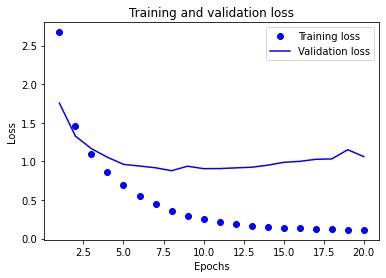

In [23]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

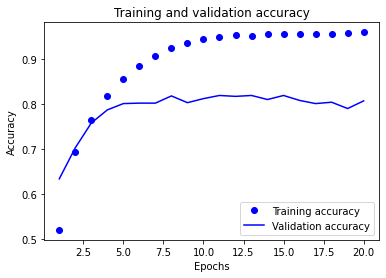

In [24]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here we can see the optimal epoch is 9

### RETRAINING THE NAIVE MODEL :

In [25]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 47ms/step - loss: 2.4853 - accuracy: 0.5119
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.3908 - accuracy: 0.6948
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 1.0262 - accuracy: 0.7804
Epoch 4/9
18/18 [==============================] - 1s 48ms/step - loss: 0.7945 - accuracy: 0.8336
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6232 - accuracy: 0.8688
Epoch 6/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4938 - accuracy: 0.8960
Epoch 7/9
18/18 [==============================] - 1s 46ms/step - loss: 0.3932 - accuracy: 0.9158
Epoch 8/9
18/18 [==============================] - 1s 46ms/step - loss: 0.3212 - accuracy: 0.9292
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9483 - accuracy: 0.7952


In [26]:
results

[0.9482555389404297, 0.7951914668083191]

We have now a accuracy of 80%. 

### PREDICT ON NEW DATA :

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0]) #sum of probas = 1

1.0000001

In [30]:
np.argmax(predictions[0]) #The predicted class is the highest proba class

3

### NOTES : 

If we would encoded the labels as integer tensors, we must used the sparse_categorical_crossentropy loss function :    

In [31]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [33]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",   #loss function for integer tensors 
              metrics=["accuracy"])